# Домашнее задание №1

В этом домашнем задании вам предлагается обучить модель регрессии для предсказания стоимости автомобилей, а также реализовать веб-сервис для применения построенной модели на новых данных.

> Оценка за домашку = min(ваш балл, 10)


Задания, <font color='#9933CC'>выделенные фиолетовым</font>, требуют от вас написания кода.

А вопросы, <font color='#FF6600'>выделенные оранжевым</font>, текстового ответа.

Оцениваются как код, так и ответы на вопросы. Если нет одного и/или другого, то часть баллов за соответствующее задание без колебаний снимается.

In [165]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns

random.seed(42)
np.random.seed(42)

Ниже ответьте на вопрос <font color='#FF6600'>
"Для чего фиксируем сиды в домашках?"</font>

In [166]:
print("Фиксируем сиды, чтобы можно было бы вопроизвести рез-ты. " + 
      "Без этого результат любых ф-ий генерирующих случайные наборы каждый раз будут разными")

Фиксируем сиды, чтобы можно было бы вопроизвести рез-ты. Без этого результат любых ф-ий генерирующих случайные наборы каждый раз будут разными


# Часть 1 (2.5 балла + 0.75) | EDA

## Простейший EDA и обработка признаков (1.5 балла + 0.25)

In [167]:
df_train = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_test.csv')

print("Train data shape:", df_train.shape)
print("Test data shape: ", df_test.shape)

Train data shape: (6999, 13)
Test data shape:  (1000, 13)


(0.15 балла) <font color='#9933CC'>Отобразите 10 **случайных** строк тренировочного датасета</font>

In [168]:
print(df_train.sample(10, random_state=1))

                                    name  year  selling_price  km_driven  \
2305       Honda Amaze V CVT Petrol BSIV  2019         779000       7032   
4387      Hyundai Creta 1.6 CRDi SX Plus  2017        1150000      27000   
1686                 Honda City i VTEC V  2017         860000      28000   
4706                Ford Figo Diesel LXI  2012         225000      60000   
6737              Honda Mobilio S i VTEC  2017         600000      70000   
1651  Ford Endeavour 3.2 Titanium AT 4X4  2016        2280000     120000   
1528                Maruti Swift 1.3 VXi  2007         150000      70000   
6548              Maruti Wagon R VXI 1.2  2015         365000      28000   
6188                Honda City i DTec VX  2016        1000000      50000   
5388                     Hyundai EON Era  2014         225000      35000   

        fuel       seller_type transmission         owner     mileage  \
2305  Petrol  Trustmark Dealer    Automatic   First Owner   19.0 kmpl   
4387  Diesel     

(0.1 балла) <font color='#9933CC'>Отобразите первые 5 и последние 5 объектов тестового датасета</font>

In [169]:
print(df_test.head(5))

                                     name  year  selling_price  km_driven  \
0                  Mahindra Xylo E4 BS IV  2010         229999     168000   
1              Tata Nexon 1.5 Revotorq XE  2017         665000      25000   
2                    Honda Civic 1.8 S AT  2007         175000     218463   
3                    Honda City i DTEC VX  2015         635000     173000   
4  Tata Indica Vista Aura 1.2 Safire BSIV  2011         130000      70000   

     fuel seller_type transmission         owner    mileage   engine  \
0  Diesel  Individual       Manual   First Owner  14.0 kmpl  2498 CC   
1  Diesel  Individual       Manual   First Owner  21.5 kmpl  1497 CC   
2  Petrol  Individual    Automatic   First Owner  12.9 kmpl  1799 CC   
3  Diesel  Individual       Manual   First Owner  25.1 kmpl  1498 CC   
4  Petrol  Individual       Manual  Second Owner  16.5 kmpl  1172 CC   

   max_power                   torque  seats  
0    112 bhp  260 Nm at 1800-2200 rpm    7.0  
1  108.5 b

In [170]:
print(df_test.tail(5))

                                 name  year  selling_price  km_driven    fuel  \
995            Hyundai i10 Magna 1.1L  2008         250000     100000  Petrol   
996  Hyundai i20 2015-2017 Sportz 1.2  2017         440000      50000  Petrol   
997            Hyundai i20 Era Diesel  2009         340000      40000  Diesel   
998                  Hyundai i10 Asta  2012         350000      25000  Petrol   
999              Honda City i DTec SV  2016         700000     110000  Diesel   

    seller_type transmission         owner     mileage   engine  max_power  \
995  Individual       Manual  Second Owner  19.81 kmpl  1086 CC  68.05 bhp   
996  Individual       Manual  Second Owner   18.6 kmpl  1197 CC  81.83 bhp   
997  Individual       Manual   First Owner   23.0 kmpl  1396 CC     90 bhp   
998  Individual       Manual   First Owner  20.36 kmpl  1197 CC   78.9 bhp   
999  Individual       Manual   First Owner   26.0 kmpl  1498 CC   98.6 bhp   

                       torque  seats  
995  

(0.1 балла) <font color='#9933CC'>Посчитайте основные статистики как по числовым, так и по категориальным столбцам для трейна и теста</font>. 
> Подсказка: ``.describe()`` с нужным(и) аргументом(-ами)



In [171]:
print(df_train.describe(include='all'))

                          name         year  selling_price     km_driven  \
count                     6999  6999.000000   6.999000e+03  6.999000e+03   
unique                    1924          NaN            NaN           NaN   
top     Maruti Swift Dzire VDI          NaN            NaN           NaN   
freq                       116          NaN            NaN           NaN   
mean                       NaN  2013.818403   6.395152e+05  6.958462e+04   
std                        NaN     4.053095   8.089419e+05  5.772400e+04   
min                        NaN  1983.000000   2.999900e+04  1.000000e+00   
25%                        NaN  2011.000000   2.549990e+05  3.500000e+04   
50%                        NaN  2015.000000   4.500000e+05  6.000000e+04   
75%                        NaN  2017.000000   6.750000e+05  9.700000e+04   
max                        NaN  2020.000000   1.000000e+07  2.360457e+06   

          fuel seller_type transmission        owner    mileage   engine  \
count     6

In [172]:
print(df_test.describe(include='all'))

                       name         year  selling_price      km_driven  \
count                  1000  1000.000000   1.000000e+03    1000.000000   
unique                  621          NaN            NaN            NaN   
top     Maruti Alto 800 LXI          NaN            NaN            NaN   
freq                     15          NaN            NaN            NaN   
mean                    NaN  2013.681000   6.179010e+05   71393.341000   
std                     NaN     4.012149   7.585539e+05   48486.218662   
min                     NaN  1995.000000   3.100000e+04    1303.000000   
25%                     NaN  2011.000000   2.500000e+05   37000.000000   
50%                     NaN  2014.000000   4.349990e+05   61500.000000   
75%                     NaN  2017.000000   6.700000e+05  100000.000000   
max                     NaN  2020.000000   6.000000e+06  375000.000000   

          fuel seller_type transmission        owner    mileage   engine  \
count     1000        1000         

(0.15 балла) <font color='#9933CC'>Посмотрите, есть ли в датасете пропуски.</font>

<font color='#FF6600'>Если есть, то в каких колонках?</font>

In [173]:
print(f'Есть пропуски в следующих колонках:\
 {", ".join(df_train.isna().sum().loc[lambda x: x > 0].index.values.tolist())}.')

Есть пропуски в следующих колонках: mileage, engine, max_power, torque, seats.


(0.1 балла) <font color='#9933CC'>Посмотрите, есть ли в трейне объекты с одинаковым признаковым описанием</font> (целевую переменную следует исключить). Если есть, то сколько?

In [174]:
print(df_train.loc[:, df_train.columns != 'selling_price'].duplicated(keep=False).sum())

1799


(0.15 балла) <font color='#9933CC'>Отобразите такие объекты</font>

In [175]:
print(df_train[df_train.loc[:, df_train.columns != 'selling_price'].duplicated(keep=False)])

                                          name  year  selling_price  \
22                     Maruti Baleno Delta 1.2  2016         575000   
26                 Maruti Omni E MPI STD BS IV  2018         254999   
27             Maruti Vitara Brezza LDi Option  2017         670000   
28                          Fiat Palio 1.2 ELX  2003          70000   
29                   Maruti Omni 8 Seater BSIV  2012         150000   
...                                        ...   ...            ...   
6981  Ford Freestyle Titanium Plus Diesel BSIV  2018         750000   
6984  Ford Freestyle Titanium Plus Diesel BSIV  2018         746000   
6989                    Maruti Swift Dzire VDI  2015         625000   
6997                           Tata Indigo CR4  2013         290000   
6998                           Tata Indigo CR4  2013         290000   

      km_driven    fuel seller_type transmission         owner     mileage  \
22        45000  Petrol  Individual       Manual   First Owner   21.4

(0.15 балла) <font color='#9933CC'>Удалите повторяющиеся строки</font>. Если при одинаковом признаковом описании цены на автомобили отличаются, то оставьте первую строку по этому автомобилю

In [176]:
df_train.drop_duplicates(
    subset = df_train.columns[df_train.columns != 'selling_price'].to_list(), 
    keep = 'first',
    inplace = True)

In [177]:
assert df_train.shape == (5840, 13)

(0.1 балла) Чтоб все было по красоте, <font color='#9933CC'>обновите индексы строк таким образом, чтобы они шли от 0 без пропусков</font>

In [178]:
df_train.reset_index(inplace = True, drop = True)
print(df_train.index)

RangeIndex(start=0, stop=5840, step=1)


Вы могли заметить, что с признаками ``mileage, engine, max_power и torque`` всё не слава богу. Давайте починим.

(0.25 балла) Задача такая: 
<font color='#9933CC'>
* убрать единицы измерения для признаков ``mileage, engine, max_power``. 
* кастануть эти столбцы столбцы к ``float``.
* удалить столбец ``torque``
</font>

> Все действия нужно производить над обоими датасетами

---
**Доп (0.25 балла):**
* <font color='#9933CC'>Вместо удаления признак `torque` разделите на два: собственно `torque` и `max_torque_rpm`.</font> Учтите единицы измерения. Они разные ☹

In [179]:
def convert_str_vars(df):
    return (df.eval("mileage = mileage.str.extract(r'(\d+\.*\d*)(?=\skmpl)').astype('float')")
              .eval("engine = engine.str.extract(r'(^\d+\.*\d*)(?=\sCC$)').astype('float')")
              .eval("max_power = max_power.str.extract(r'(\d+\.*\d*)(?=\sbhp)').astype('float')")
              .drop('torque', axis = 1))

df_train, df_test = map(convert_str_vars, [df_train, df_test])
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5840 entries, 0 to 5839
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           5840 non-null   object 
 1   year           5840 non-null   int64  
 2   selling_price  5840 non-null   int64  
 3   km_driven      5840 non-null   int64  
 4   fuel           5840 non-null   object 
 5   seller_type    5840 non-null   object 
 6   transmission   5840 non-null   object 
 7   owner          5840 non-null   object 
 8   mileage        5577 non-null   float64
 9   engine         5654 non-null   float64
 10  max_power      5653 non-null   float64
 11  seats          5654 non-null   float64
dtypes: float64(4), int64(3), object(5)
memory usage: 547.6+ KB


(0.15 балла) <font color='#9933CC'>Заполните пропуски в столбцах медианами. Убедитесь, что после заполнения пропусков не осталось</font>

> Обратите внимание, что, по уму, нужно посчитать медиану по трейну и этим средним заполнять пропуски в тесте. Так же делаем, если, например, стандартизируем признаки.



In [180]:
train_medians = df_train[df_train.isna().sum().loc[lambda x: x > 0].index.to_list()].median()
df_train, df_test = map(lambda df: df.fillna(train_medians), [df_train, df_test])

[i for i in map(lambda df: df.isna().sum().sum() == 0, [df_train, df_test])]

[True, True]


(0.1 балла) Теперь, когда не осталось пропусков, можно <font color='#9933CC'>преобразовать столбцы к более подходящим типам (``engnine`` и ``seats`` к int)
</font>

Ниже ответьте, <font color='#FF6600'>почему (хоть мы этого и не делаем) ``seats``, возможно, лучше сделать переменной категориальной, а не целочисленной.</font>

In [181]:
def convert_to_int(df):
    return (df.eval("engine = engine.astype('int')")
              .eval("seats = seats.astype('int')"))
df_train, df_test = map(convert_to_int, [df_train, df_test])

df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5840 entries, 0 to 5839
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           5840 non-null   object 
 1   year           5840 non-null   int64  
 2   selling_price  5840 non-null   int64  
 3   km_driven      5840 non-null   int64  
 4   fuel           5840 non-null   object 
 5   seller_type    5840 non-null   object 
 6   transmission   5840 non-null   object 
 7   owner          5840 non-null   object 
 8   mileage        5840 non-null   float64
 9   engine         5840 non-null   int64  
 10  max_power      5840 non-null   float64
 11  seats          5840 non-null   int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 547.6+ KB


In [182]:
print("Между кол-вом сидений и ценой нет линейной связи.\n" + 
      "Мы не можем сказать, что чем больше сидений тем лучше/хуже автомобиль.\n" + 
      "Это характеристика, скажем так, 'сильно на любителя'.\n" + 
      "Для кого-то автомобиль с семью сиденьями совершенно неприемлем.\n" +
      "А кому-то - только такой и нужен")

Между кол-вом сидений и ценой нет линейной связи.
Мы не можем сказать, что чем больше сидений тем лучше/хуже автомобиль.
Это характеристика, скажем так, 'сильно на любителя'.
Для кого-то автомобиль с семью сиденьями совершенно неприемлем.
А кому-то - только такой и нужен


## Визуализации (1 балл + 0.5)

Визуализировать нам надо не так уж и много. Во-первых, хотелось бы, в принципе, увидеть как распределены значения признаков. Также хотелось бы понять, насколько признаки скоррелированы между собой и с целевой переменной. А ещё неплохо бы посмотреть, не оказалось ли так, что тестовые данные распределены иначе, чем трейн.

Этим всем и предлагаем вам заняться.

(0.25 балла) <font color='#9933CC'>Посторойте попарные распределения всех числовых признаков для трейна.</font>

> ``sns.paiplot()`` позволяет сделать это в одну строчку

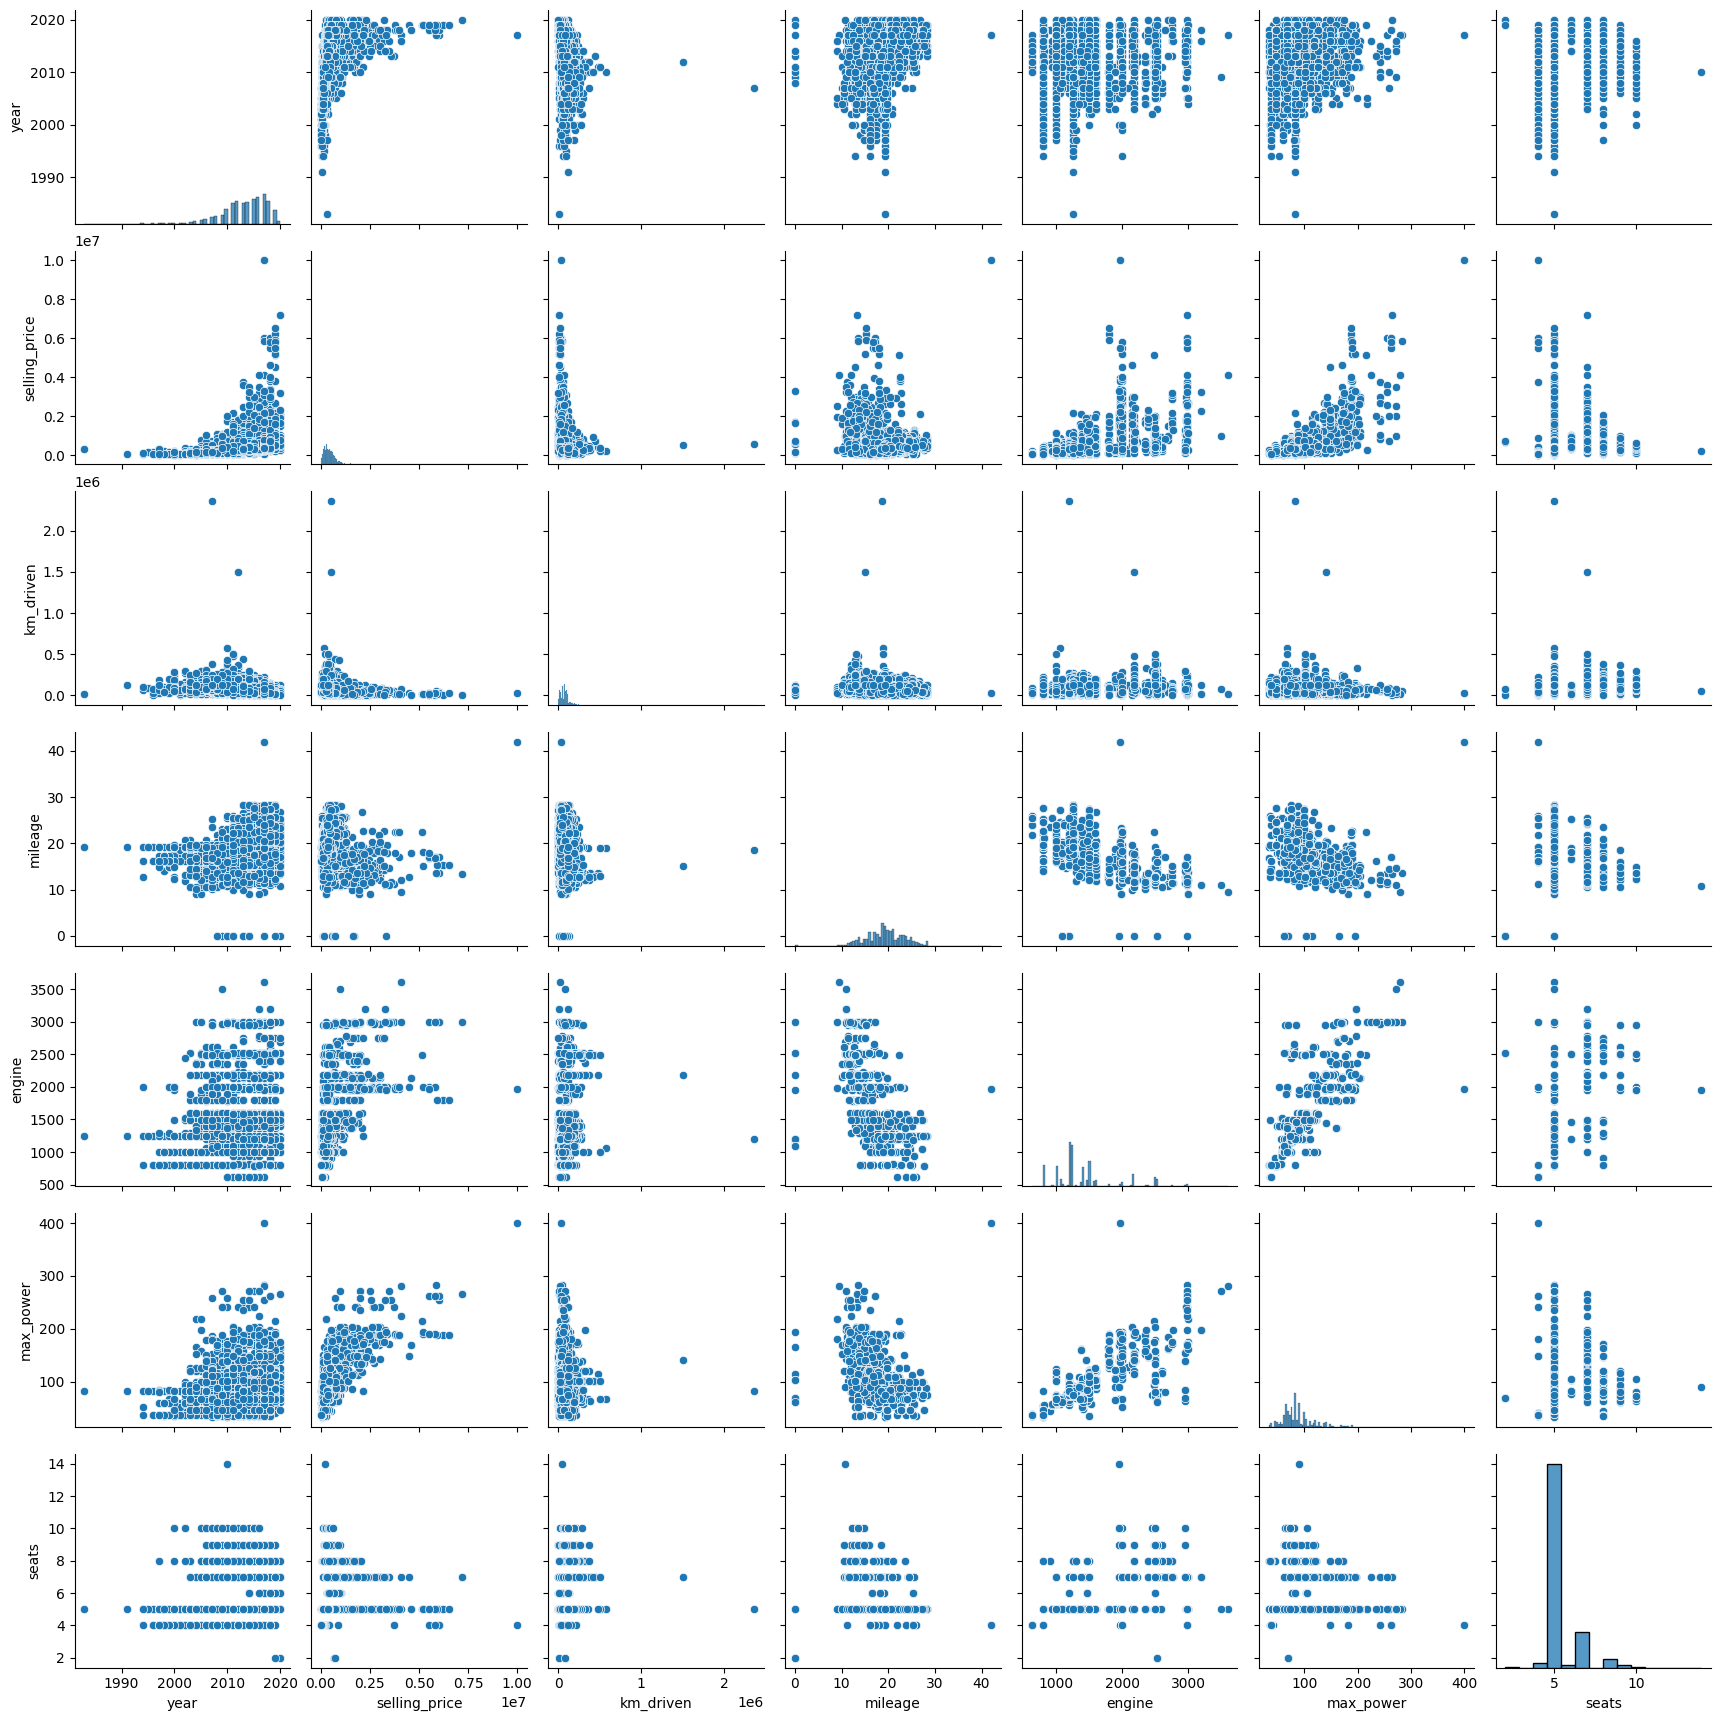

In [183]:
sns.pairplot(df_train)

Этот график не такой информативный, как можно было бы построить, беря признаки по отдельности. Но он позволяет сделать некоторые (возможно, далеко идущие) выводы. Впрочем, со многими из них (если не со всеми) вы бы справились умозрительно. Однако всегда приятно делать выводы, основываясь на данных.



* <font color='#FF6600'> Что можно сказать о связи предикторов с целевой переменной?
* А о корреляциях признаков? </font>

In [184]:
print("По графикам можно сделать вывод, что наиболее сильная связь с целевой переменной наблюдается" + 
      "у следующих предикторов: year, km_driven, engine, max_power. Однако нельзя сказать," +
      "что связь линейная. Ни на одном графике не видно чего-то напоминающего прямую линию под углом pi/4, 3pi/4." +
      "Скорее чётко видно, что с среди автомобилей с очень ранним годом выпуска, очень большим пробегом," +
      "слабым двигателем нет дорогих автомобилей. Однако наличие обратных значений (поздний год выпуска, " +
      "небольшой прбег итд.) не гарантируюет высокой цены. Признаки mileage и seats стоят особняком" +
      ": по ним наблюдается более сложная зависимость.\n" +
      "Среди попарного сравнения предикторов наиболее выразительную связь наблюдаем среди пары: engine, max_power" +
      ", что вполне логично.")

По графикам можно сделать вывод, что наиболее сильная связь с целевой переменной наблюдаетсяу следующих предикторов: year, km_driven, engine, max_power. Однако нельзя сказать,что связь линейная. Ни на одном графике не видно чего-то напоминающего прямую линию под углом pi/4, 3pi/4.Скорее чётко видно, что с среди автомобилей с очень ранним годом выпуска, очень большим пробегом,слабым двигателем нет дорогих автомобилей. Однако наличие обратных значений (поздний год выпуска, небольшой прбег итд.) не гарантируюет высокой цены. Признаки mileage и seats стоят особняком: по ним наблюдается более сложная зависимость.
Среди попарного сравнения предикторов наиболее выразительную связь наблюдаем среди пары: engine, max_power, что вполне логично.


(0.25 балла) <font color='#9933CC'>Постройте pairplot по тестовым данным</font> и ответьте на вопрос <font color='#FF6600'>"Похожими ли оказались совокупности при разделении на трейн и тест?"</font>

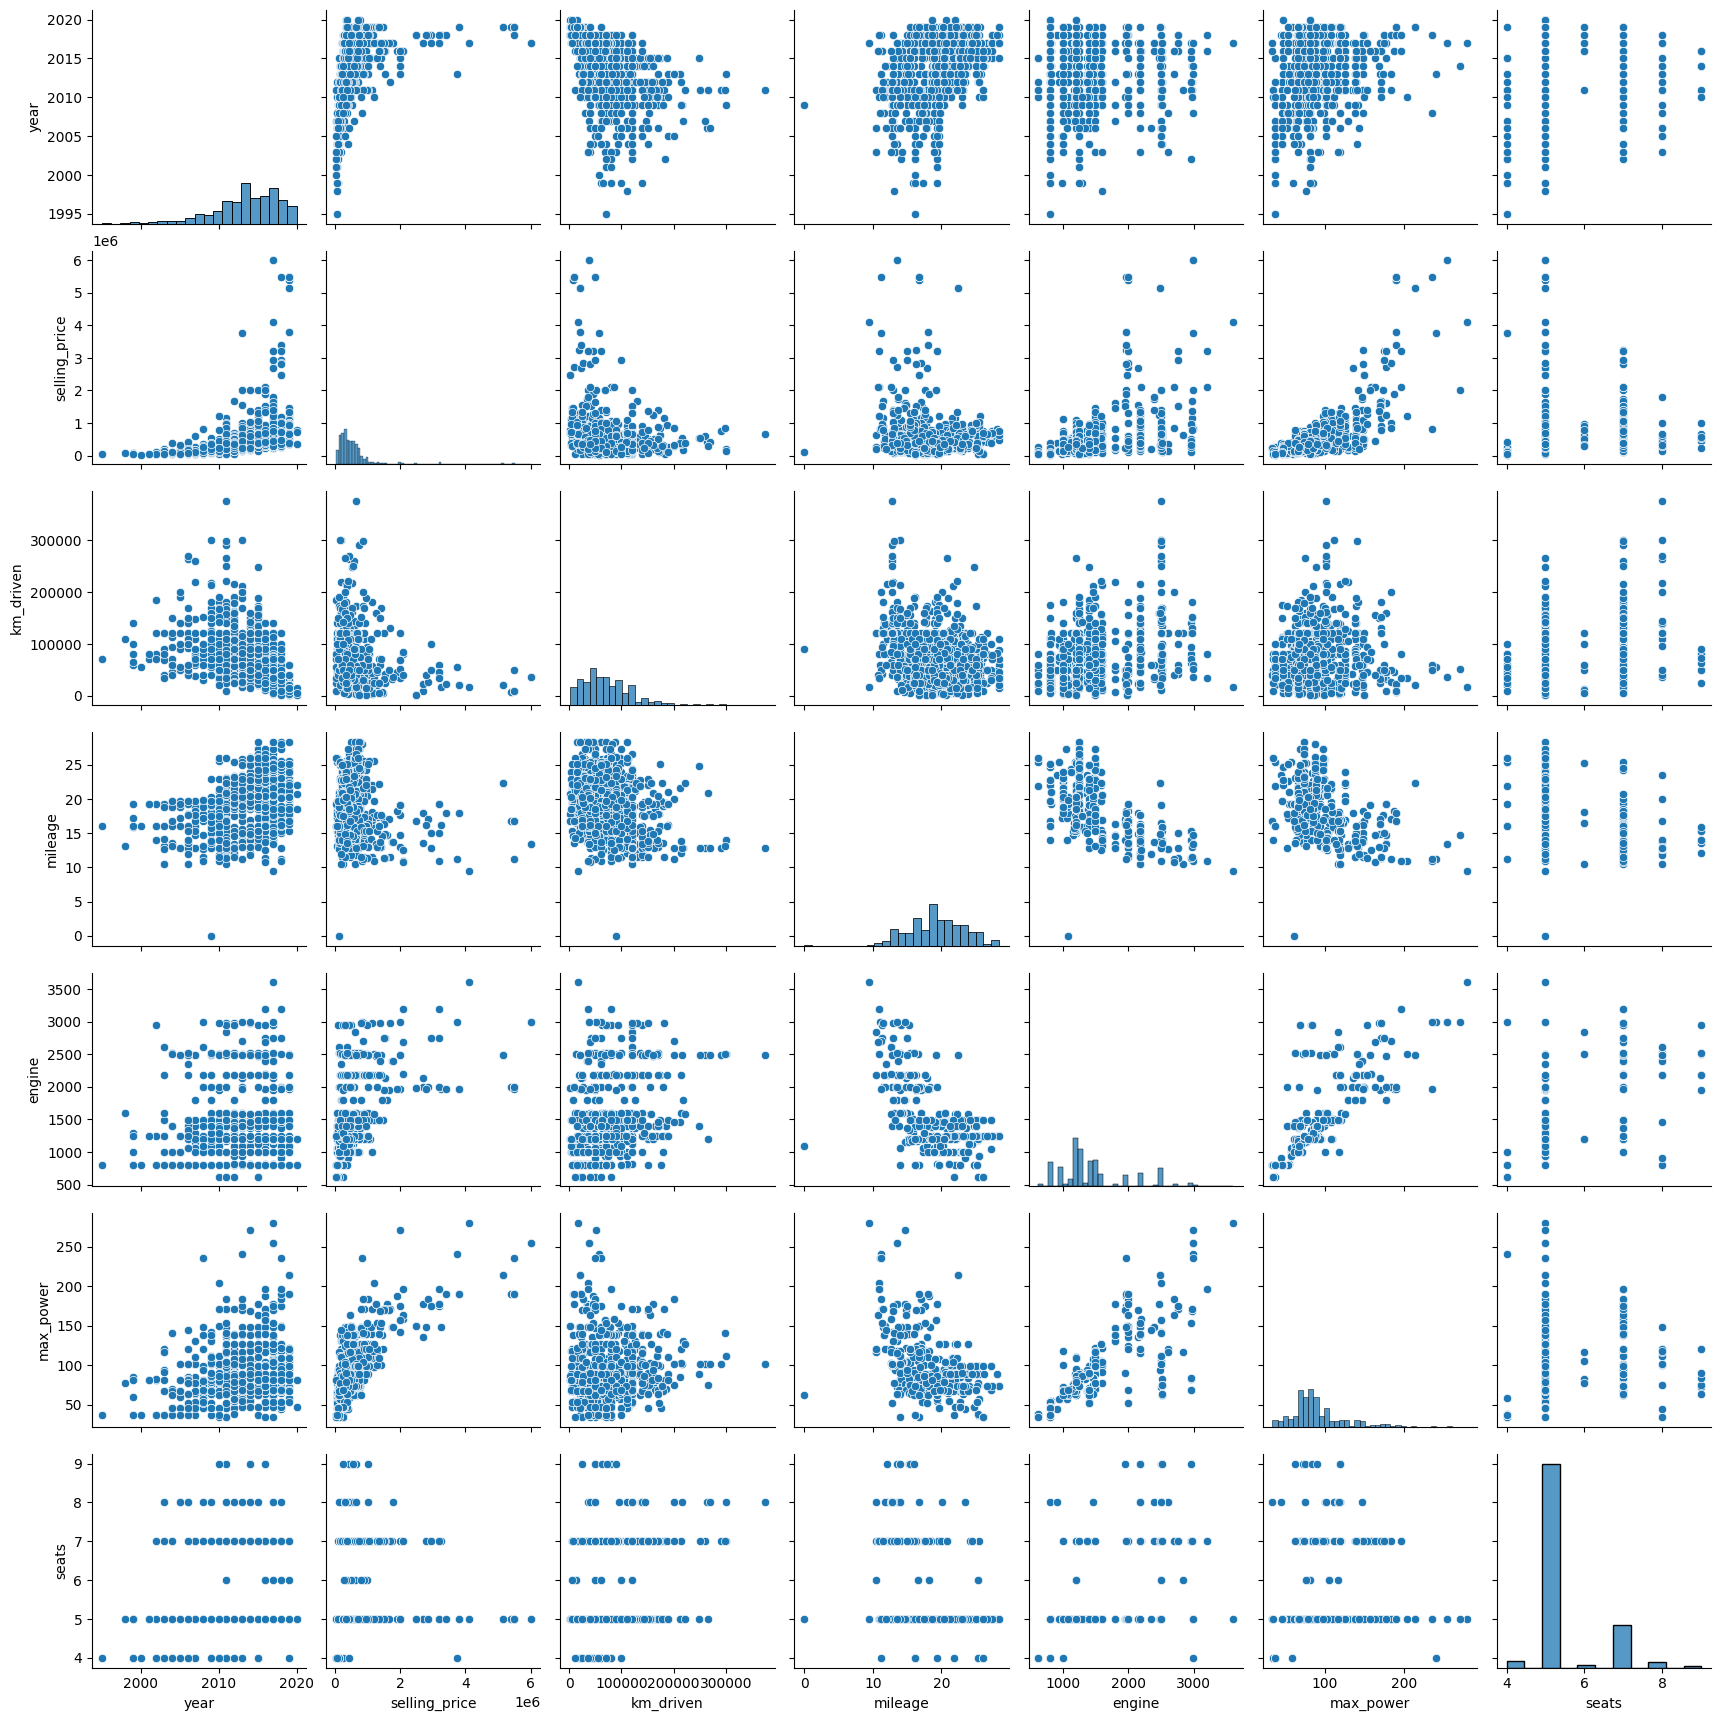

In [185]:
sns.pairplot(df_test)

In [186]:
print("На тестовом датасете наблюдаем схожую с тренировочным картину")

На тестовом датасете наблюдаем схожую с тренировочным картину


(0.25 балла) <font color='#9933CC'>Для трейна давайте построим тепловую карту (heatmap из библиотеки seaborn) попарных корреляций числовых колонок</font>

<AxesSubplot: >

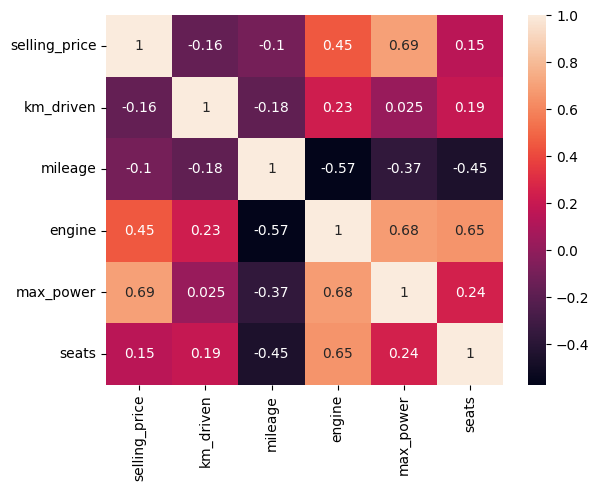

In [187]:
df_corr = df_train[df_train.dtypes.loc[lambda x: x != 'object'].index.to_list()[1:]].corr()
sns.heatmap(df_corr, annot = True)

Ответьте, пожалуйста, на вопросы: 
* <font color='#FF6600'>Какие 2 признака наименее скоррелированы между собой?</font>
* <font color='#FF6600'>Между какими наблюдается довольно сильная положительная линейная зависимость?</font>
* <font color='#FF6600'>Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи.</font>

In [188]:
print("Наименее скоррелированы между собой mileage и selling_price.\n" +
      "Довольно сильная положительная линейная зависимость наблюдается между:\n" +
      " max_power - selling_price\n" +
      " max_power - engine\n" +
      " seats - engine\n" +
      "Основываясь на значении коэф. корреляции - да, правильно.")

Наименее скоррелированы между собой mileage и selling_price.
Довольно сильная положительная линейная зависимость наблюдается между:
 max_power - selling_price
 max_power - engine
 seats - engine
Основываясь на значении коэф. корреляции - да, правильно.


(0.25 балла) <font color='#9933CC'> Отобразите диаграммe рассеяния для наиболее скореллированной пары **признаков** (на трейне) </font>

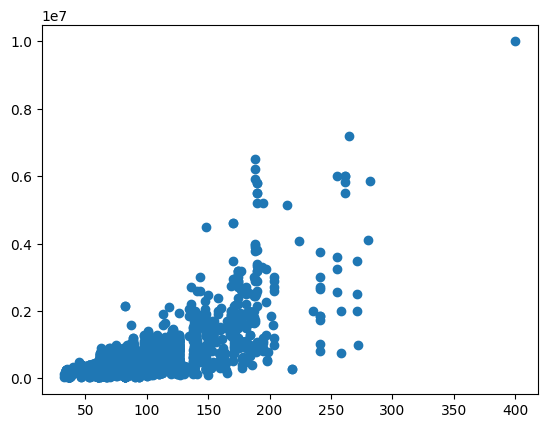

In [189]:
plt.scatter(df_train['max_power'], df_train['selling_price'])

### Дополнительные визуализации (бонус 0.5 балла)

Если вам кажется, что мы не попросили вас нарисовать какие-то очень важные зависимости, нарисуйте их и поясните.

Думаю не лишним будет посмотреть на распределение целевой переменной подробнее.На графиках видно что в целевой переменной достаточно много выбросов.


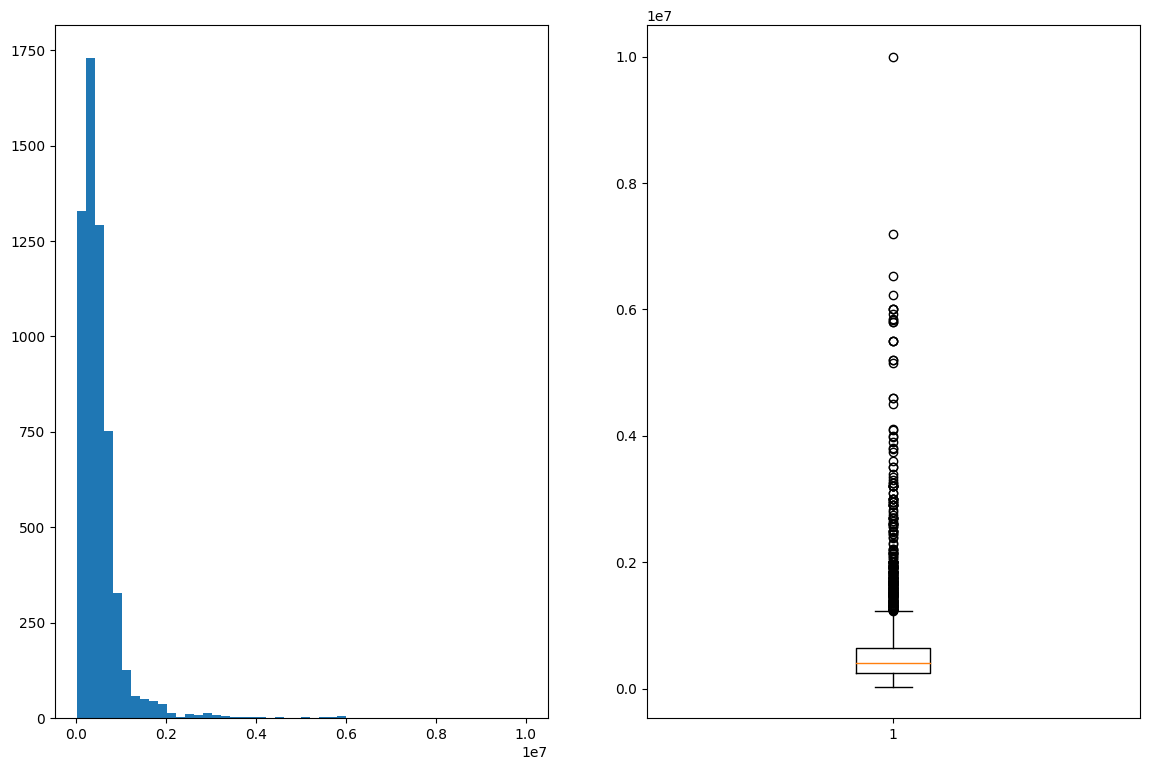

In [190]:
print('Думаю не лишним будет посмотреть на распределение целевой переменной подробнее.' +
      'На графиках видно что в целевой переменной достаточно много выбросов.')
fig, ax = plt.subplots(1, 2, figsize=(14,9))
ax[0].hist(df_train['selling_price'], bins = 50)
ax[1].boxplot(df_train['selling_price'])
plt.show()

Также можно посмотреть на средние значения по сгруппированным значениям категорияальных переменных.Можно отметить, что есть значения, по которым целевая переменная сильно отличается от остальных


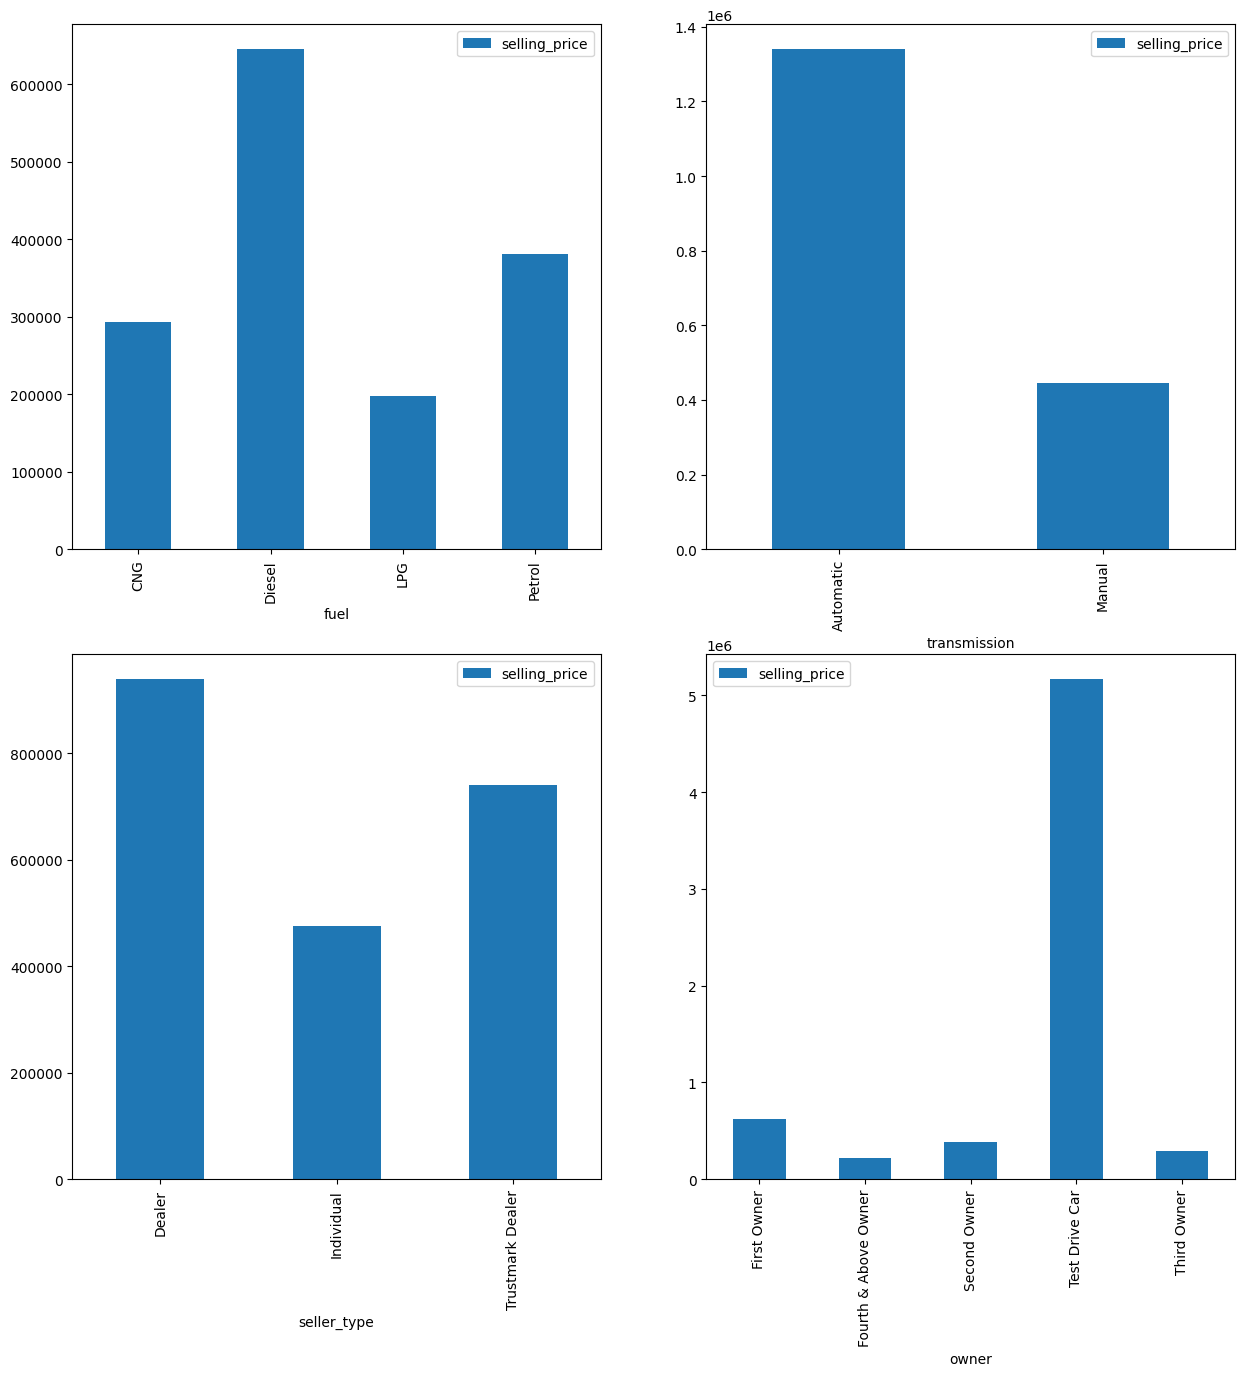

In [191]:
print('Также можно посмотреть на средние значения по сгруппированным значениям категорияальных переменных.' +
      'Можно отметить, что есть значения, по которым целевая переменная сильно отличается от остальных')
fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize = (15, 15))
ls_df = map(lambda x: df_train.groupby(x).aggregate({'selling_price': 'mean'}),
            ['fuel', 'transmission', 'seller_type',  'owner'])
for df, ax_ex in zip(ls_df, [ax[0][0], ax[0][1], ax[1][0], ax[1][1]]):
    df.plot(kind = 'bar', ax = ax_ex) 

# Часть 2 (1.25 балла) | Модель только на вещественных признаках

(0.05 балла) <font color='#9933CC'>В переменные ``y_train`` и ``y_test`` запишите значения целевых переменных. Столбцы ``selling_price`` из датафреймов необходимо удалить. Категориальные (все, кроме ``seats``) столбцы тоже.</font>

In [192]:
y_train = df_train['selling_price']
lables_to_drop = df_train.dtypes.loc[lambda x: x == 'object'].index.to_list() + ['selling_price']
X_train = df_train.drop(lables_to_drop, axis = 1)
print(X_train)

      year  km_driven  mileage  engine  max_power  seats
0     2014     145500    23.40    1248      74.00      5
1     2014     120000    21.14    1498     103.52      5
2     2010     127000    23.00    1396      90.00      5
3     2007     120000    16.10    1298      88.20      5
4     2017      45000    20.14    1197      81.86      5
...    ...        ...      ...     ...        ...    ...
5835  2008     191000    17.92    1086      62.10      5
5836  2013      50000    18.90     998      67.10      5
5837  2013     110000    18.50    1197      82.85      5
5838  2007     119000    16.80    1493     110.00      5
5839  2009     120000    19.30    1248      73.90      5

[5840 rows x 6 columns]


In [193]:
assert X_train.shape == (5840, 6)

In [194]:
y_test = df_test['selling_price']
X_test = df_test.drop(lables_to_drop, axis = 1)

In [195]:
assert X_test.shape == (1000, 6)

(0.2 балла) <font color='#9933CC'>Обучите классическую линейную регрессию с дефолтными параметрами. Посчтитайте $R^2$ и MSE для трейна и для теста</font>

**Замечание:** $R^2$ и MSE для трейна и для теста выводите везде, где требуется обучать модели, даже если в явном виде этого не просят. Иначе непонятно, как понять, насколько успешны наши эксперименты.

In [196]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error as MSE

model = LinearRegression()
model.fit(X_train, y_train)

def show_efficency(model = model, 
                   X_train = X_train, X_test = X_test, 
                   y_train = y_train, y_test = y_test):
    print(f'R^2 on train: {r2_score(y_train, model.predict(X_train))}')
    print(f'MSE on train: {MSE(y_train, model.predict(X_train))}')
    print(f'R^2 on test: {r2_score(y_test, model.predict(X_test))}')
    print(f'MSE on test: {MSE(y_test, model.predict(X_test))}')

show_efficency()    

R^2 on train: 0.5931518145936374
MSE on train: 116618287828.80112
R^2 on test: 0.5945557514823003
MSE on test: 233060931767.3438


Запомните правило:

> Использую линейную модель -- стандартизирую фичи

(0.25 балла) <font color='#9933CC'>Воспользуемся им</font>


In [197]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = pd.DataFrame(scaler.transform(X_train), columns = X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)
model = LinearRegression()
model.fit(X_train_scaled, y_train)

show_efficency(model = model, X_train = X_train_scaled, X_test = X_test_scaled)


R^2 on train: 0.5931518145936374
MSE on train: 116618287828.80112
R^2 on test: 0.5945557514823121
MSE on test: 233060931767.337


Не очень результативно.

Зато уже сейчас можем интерпретировать модель. <font color='#FF6600'>"Какой признак оказался наиболее информативным в предсказании цены?"</font>

In [198]:
print(pd.DataFrame({'coefs': model.coef_}, index = X_train.columns.to_list()).sort_values('coefs', ascending = False))
print('\nНаиболее информативным в предсказании цены оказался признак max_power')

                   coefs
max_power  324132.801868
year       152587.036728
engine      59359.359384
mileage     28729.974158
seats      -22332.756258
km_driven  -44028.421576

Наиболее информативным в предсказании цены оказался признак max_power


(0.25 балла) <font color='#9933CC'>Теперь попробуем Lasso-регрессию.</font> Здесь и дальше обучайте модели на нормализованных признаках

In [199]:
from sklearn.linear_model import Lasso

model = Lasso()
model.fit(X_train_scaled, y_train)
show_efficency(model, X_train_scaled, X_test_scaled)

R^2 on train: 0.5931518145583339
MSE on train: 116618287838.92046
R^2 on test: 0.5945545906092067
MSE on test: 233061599070.3475


<font color='#FF6600'>Занулила ли L1-регуляризация с параметрами по умолчанию какие-нибудь веса? Почему же?</font>

In [200]:
print(f'Не занулила: {model.coef_}')
print('По умолчанию регуляризатор равен alpha*sum(abs(coefs)) при alpha=1, что в сумме даёт 600-700к.' + 
      'Для сравнения MSE=2.3e11. То есть при минимизации ф-ии потерь, значение регуляризатора очень' +
      ' маленькое по сравнению с ошибкой, поэтому и не влияет на модель')

Не занулила: [152586.84579948 -44027.29214616  28728.09438674  59354.50510813
 324133.71200905 -22329.87284691]
По умолчанию регуляризатор равен alpha*sum(abs(coefs)) при alpha=1, что в сумме даёт 600-700к.Для сравнения MSE=2.3e11. То есть при минимизации ф-ии потерь, значение регуляризатора очень маленькое по сравнению с ошибкой, поэтому и не влияет на модель


(0.25 балла) <font color='#9933CC'>Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для Lasso-регрессии</font>

Вам пригодится класс [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).

In [201]:
from sklearn.model_selection import GridSearchCV

gscv = GridSearchCV(estimator = Lasso(), 
                    param_grid = {'alpha': [i for i in range(500, 12000, 500)]},
                    scoring = 'r2',
                    cv = 10)
gscv.fit(X_train_scaled, y_train)
show_efficency(model = gscv.best_estimator_, 
               X_train = X_train_scaled,
               X_test = X_test_scaled)

R^2 on train: 0.5895209857848994
MSE on train: 117659022565.39972
R^2 on test: 0.5806352466359829
MSE on test: 241062835461.91043


<font color='#FF6600'>Сколько грид-сёрчу пришлось обучать моделей?</font>

<font color='#FF6600'>Какой коэффициент регуляризации у лучшей из перебранных моделей? Занулились ли какие-нибудь из весов при такой регуляризации?</font>

In [202]:
print(f'Кол-во обученных моделей 10*кол-во параметров в гриде, т.е. - {10*len([i for i in range(500, 12000, 500)])}')
print(f'Коэффициент регуляризации у лучшей из моделей - {list(gscv.best_params_.values())[0]}')
print(f'Занулился один коэффициент - {X_train.columns.to_list()[-1]}: {gscv.best_estimator_.coef_}')

Кол-во обученных моделей 10*кол-во параметров в гриде, т.е. - 230
Коэффициент регуляризации у лучшей из моделей - 11500
Занулился один коэффициент - seats: [152228.11823799 -30643.60005851   5373.2423679   12813.47771278
 330003.0314312      -0.        ]


(0.25 балла) <font color='#9933CC'>Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html)-регрессии</font>

In [203]:
from sklearn.linear_model import ElasticNet

elnet = GridSearchCV(estimator = ElasticNet(), 
                    param_grid = {
                        'alpha': [i/10 for i in range(1, 11, 1)],
                        'l1_ratio': [i/10 for i in range(1, 10, 1)]
                        },
                    scoring = 'r2',
                    cv = 10)
elnet.fit(X_train_scaled, y_train)
show_efficency(model = elnet.best_estimator_, 
               X_train = X_train_scaled,
               X_test = X_test_scaled)

R^2 on train: 0.5862028154469929
MSE on train: 118610137397.44568
R^2 on test: 0.5641275549912885
MSE on test: 250551928006.95486


<font color='#FF6600'>Какие гиперпараметры соответствуют лучшей из перебранных моделей?</font>

In [204]:
print(f'Параметры лучшей из моделей - {elnet.best_params_}')

Параметры лучшей из моделей - {'alpha': 0.7, 'l1_ratio': 0.8}


Предлагаем вам оставить вам попытки заметно улучшить качество модели регуляризацией и перейти к следующей части задания.

# Часть 3 (0.75 балла) | Добавляем категориальные фичи



(0 баллов) <font color='#9933CC'>Из ``df_train`` удалите столбцы с целевой переменной и названием автомобиля.</font>

In [205]:
X_train_cat = df_train.drop(['name', 'selling_price'], axis = 1)
X_test_cat = df_test.drop(['name', 'selling_price'], axis = 1)

In [206]:
assert X_train_cat.shape == (5840, 10)

In [207]:
print(X_train_cat.describe(include='object'))

          fuel seller_type transmission        owner
count     5840        5840         5840         5840
unique       4           3            2            5
top     Diesel  Individual       Manual  First Owner
freq      3177        5223         5336         3603


(0.5 балла) <font color='#9933CC'>Закодируйте категориалльные фичи и ``seats`` методом OneHot-кодирования</font>

> Обратите внимание, что во избежание мультиколлинеарности следует избавиться от одного из полученных столбцов при кодировании каждого признака методом OneHot. 

In [208]:
from sklearn.preprocessing import OneHotEncoder
cats_to_encode = X_train_cat.dtypes.loc[lambda x: x == 'object'].index.to_list() + ['seats']
enc = OneHotEncoder(drop = 'first', handle_unknown = 'ignore')
enc.fit(X_train_cat[cats_to_encode])

X_train_full = pd.concat([X_train_scaled.drop('seats', axis = 1), 
                          pd.DataFrame(enc.transform(X_train_cat[cats_to_encode]).toarray())], 
                         axis = 1).rename(lambda x: str(x), axis = 'columns')

X_test_full = pd.concat([X_test_scaled.drop('seats', axis = 1), 
                         pd.DataFrame(enc.transform(X_test_cat[cats_to_encode]).toarray())], 
                        axis = 1).rename(lambda x: str(x), axis = 'columns')

(0.25 балла) <font color='#9933CC'>Переберите параметр регуляризации `alpha` для гребневой (ridge) регрессии с помощью класса `GridSearchCV`.</font> В качестве параметров при объявлении GridSearchCV кроме модели укажите метрику качества $R^2$. Кроссвалидируйтесь по 10-ти фолдам.

<font color='#FF6600'>Удалось ли улучшить качество предсказаний?</font>

In [209]:
from sklearn.linear_model import Ridge

ridge_model = GridSearchCV(estimator = Ridge(), 
                           param_grid = {
                               'alpha': [i for i in range(1, 11, 1)]
                           },
                           scoring = 'r2',
                           cv = 10)
ridge_model.fit(X_train_full, y_train)
show_efficency(model = ridge_model.best_estimator_, 
               X_train = X_train_full,
               X_test = X_test_full)
print('Качество предсказаний на датафрейме с категориальными переменными выше чем без них')

R^2 on train: 0.6563281648127045
MSE on train: 98509523778.49182
R^2 on test: 0.6452359970942624
MSE on test: 203928479382.81802
Качество предсказаний на датафрейме с категориальными переменными выше чем без них


# Часть 4 - бонусная (2 балла) | Feature Engineering 

В этой части домашнего задания вам предлагается проявить свою креативность для улучшения прогноза модели. Любые другие модели, кроме различных форм линейной (или полиномиальной) регресси, использовать запрещается. А значит, придется работать с признаками

**Что можно попробовать сделать?** (каждый пункт по 0.4 балла, но не больше 2-х баллов в сумме)

1.   *Сгенерировать новые признаки на основе уже существующих:*
    * посчитать произведения // частные признаков (кажется, что посчитать число "лошадей" на литр объема может быть полезно);
    * имеет смысл обратить внимание на визуализации в части с EDA (к примеру, зависимость цены от года выглядит квадратичной, а не линейной; значит, квадрат года нам, скорее всего, принесет больше пользы)

2.   *Добыть новые признаки:*
    * имеем название автомобиля, которое никак не используем (можно спарсить инфу о классе автомобиля или каких-то специфических опциях)
    * можно добавить пороговые признаки вроде "владелец третий или больше" и объединить признаки в некоторые осмысленные правила, например "первый или второй владелец и продавец официальный дилер" (подбирать пороги удобно по диаграммам рассеяния)

3.   *Поработать с уже имеющимися:*
    * далеко не факт, что заполнить пропуск медианой было лучшей идеей (как минимум, можно добавить dummy-столбец для модели, сигнализирующий, что раньше на месте медианы был пропуск -- там где он был, конечно); попробуйте другие способы филлинга;
    * мы не анализировали, есть ли в данных выбросы => никак выбросы не обрабатывали; наиболее простым и, тем не менее, довольно полезным вариантом нахождения выбросов могут послужить boxplot'ы для каждого столбца; что делать с выбросами думайте сами :) -- вариантов довольно много
    * мы толком не смотрели на таргет сам по себе; в нем тоже могут быть неожиданности -- стоит хотя бы проверить
    * можно заметить, что некоторые признаки распределены совсем не нормально; возможно их стоит отлогарифмировать

И так далее...

Feel Free to Try!

In [210]:
# your code here

# Часть Бизнесовая (0.5 балла)

Заказчик просил вас посчитать кастомную метрику -- среди всех предсказанных цен на авто посчитать долю предиктов, отличающихся от реальных цен на эти авто не более чем на 10% (в одну или другую сторону)

<font color='#9933CC'>Сделайте это самостоятельно для лучшей из своих моделей</font>

In [211]:
def business_metrics(y_true, y_pred):
    return sum(abs(y_true - y_pred) / y_true <= 0.1) / len(y_true)

business_metrics(y_true = y_test, y_pred = ridge_model.predict(X_test_full))

0.24

# Часть 5 (3 балла) | Реализация сервиса на FastAPI

Cделайте с помощью FastAPI сервис, который с точки зрения пользователя реализует две функции:

1. на вход в формате json подаются признаки одного объекта, на выходе сервис выдает предсказанную стоимость машины
2. на вход подается csv-файл с признаками тестовых объектов, на выходе получаем файл с +1 столбцом - предсказаниями на этих объектах

С точки зрения реализации это означает следующее:
- средствами pydantic должен быть описан класс базового объекта
- класс с коллецией объектов
- метод post, который получает на вход один объект описанного класса
- метод post, который получает на вход коллекцию объектов описанного класса

Шаблон для сервисной части дан ниже. Код необходимо дополнить и оформить в виде отдельного .py-файла.

In [212]:
import pickle

pickle_obj = {'model': ridge_model.best_estimator_,
              'standard_scaler': scaler,
              'onehot_encoder': enc,
              'cats_to_encode': cats_to_encode,
              'medians': train_medians} 

with open('model.pickle', 'wb') as file:
    pickle.dump(pickle_obj, file, protocol=pickle.HIGHEST_PROTOCOL)

In [213]:
from fastapi import FastAPI
from pydantic import BaseModel
from typing import List

app = FastAPI()


class Item(BaseModel):
    name: str
    year: int
    selling_price: int
    km_driven: int
    fuel: str
    seller_type: str
    transmission: str
    owner: str
    mileage: str 
    engine: str
    max_power: str
    torque: str
    seats: float


class Items(BaseModel):
    objects: List[Item]


@app.post("/predict_item")
def predict_item(item: Item) -> float:
    return ...


@app.post("/predict_items")
def predict_items(items: List[Item]) -> List[float]:
    return ...

Протестируйте сервис на корректность работы и приложите скриншоты (см. ниже).

# Часть 6 (1 балл) | Оформление результатов

**Результаты вашей работы** необходимо разместить в своем Гитхабе. Под результатами понимаем следующее:
* ``.ipynb``-ноутбук со всеми проведёнными вами экспериментами (output'ы ячеек, разумеется, сохранить)
* ``.py``-файл с реализацией сервиса
* ``.pickle``-файл с сохранёнными весами модели, коэффициентами скейлинга и прочими числовыми значениями, которые могут понадобиться для инференса
* ``.md``-файл с выводами про проделанной вами работе:
    * что было сделано
    * с какими результатами
    * что дало наибольший буст в качестве
    * что сделать не вышло и почему (это нормально, даже хорошо😀)

**За что могут быть сняты баллы в этом пункте:**
* за отсутствие ``.pickle``-файла с весами использованной модели
* за недостаточную аналитику в ``.md``-файле
* за оформление и логику кода (в определённом смысле это тоже элемент оформления решения)

**Как будет выглядет проверка всего домашнего задания?**
1. Ассистент проходит по ссылке на (**открытый**) репозиторий из Энитаска
2. Смотрит ``readme.md``:
    * пожалуйста, приложите в него же скрины работы вашего сервиса -- собирать ваши проекты довольно времязатратно, но хочется убедиться, что всё работает
    * можете прислать screencast в ТГ
3. Просматривает ноутбук с pure-DS частью
4. Заглядывает в код сервиса
5. Хвалит

# Часть Благодарственная

Надеемся, вы честно проделали все пункты, а не просто пролистали досюда. Потому что здесь награда за старания. Пожалуйста, не стоит награждать себя до того, как закончите работать над домашкой.

https://drive.google.com/file/d/1LT06nyg9QgVi3r-D5BY-_mQ9TcJQFxJN/view?usp=share_link

In [214]:
print('Я смотрел на улицу сквозь тюремную решетку, и среди всех проходивших мимо ' +
      'женщин я не видел ни одной, которая бы стоила этой чертовой девки.\n')
print('– Ты дьявол, – говорил я ей.\n' +
      '– Да, – подтверждала она.')

Я смотрел на улицу сквозь тюремную решетку, и среди всех проходивших мимо женщин я не видел ни одной, которая бы стоила этой чертовой девки.

– Ты дьявол, – говорил я ей.
– Да, – подтверждала она.
